In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import matplotlib.pyplot as plt

In [2]:
def getCraterSize():
    size = (np.random.random()*5)**(-2)+10
    while size > 100:
        size = (np.random.random()*8)**(-2)+10
    
    return size

In [42]:
sample_size = 10000

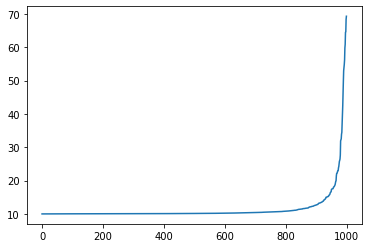

In [29]:
plt.plot(crater_sizes)
plt.show()

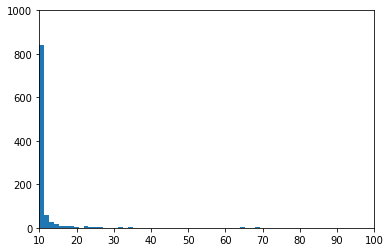

In [32]:
plt.hist(crater_sizes, 45)
plt.axis([10, 100, 0, 1000])
plt.show()

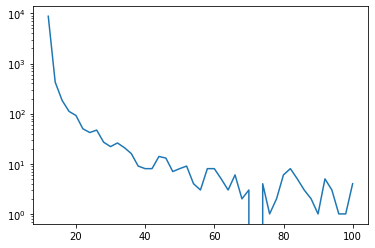

In [44]:
crater_sizes = []
for i in range(sample_size):
    crater_sizes.append(getCraterSize())
crater_sizes.sort()
y, x = np.histogram(crater_sizes, bins=45)
x = x[1:]
plt.plot(x, y)
plt.yscale('log')
plt.show()

In [23]:
class CraterSimulation:
    def __init__(self, getCraterSize, surface_size, saturation_threshold):
        self.getCraterSize = getCraterSize
        self.surface_size = surface_size
        self.num_sectors = surface_size**2
        self.saturation_threshold = saturation_threshold

        self.state = []
        self.generateState()

    def generateState(self):
        for i in range(self.surface_size):
            row = []
            for j in range(self.surface_size):
                row.append(0)
            self.state.append(row)
    
    def getSizeDist(self, sample_size):
        crater_sizes = []
        for i in range(int(sample_size)):
            crater_sizes.append(getCraterSize())
        crater_sizes.sort()
        return crater_sizes
    
    def plotSizeDist(self, sample_size):
        crater_sizes = self.getSizeDist(sample_size)
        y, x = np.histogram(crater_sizes, bins=45)
        x = x[1:]
        plt.plot(x, y)
        plt.yscale('log')
        plt.show()
    
    def getSaturation(self):
        obliterated_sectors = 10000
        for row in self.state:
            for sector in row:
                if sector: obliterated_sectors += 1
        return 100.0*obliterated_sectors/self.num_sectors
    
    def runSim(self):
        print(self.num_sectors)
        print(self.getSaturation())
        

In [26]:
sim = CraterSimulation(getCraterSize, 500, 95)
# sim.plotSizeDist(1e6)

In [27]:
sim.runSim()

250000
4.0
